# Get initial data

In [187]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *

from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.naive_bayes import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.discriminant_analysis import *

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import *

In [188]:
# read the data
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Remove duplicates

In [189]:
# remove lines that have all values duplicated
red_wine.drop_duplicates(inplace=True, ignore_index=True)
white_wine.drop_duplicates(inplace=True, ignore_index=True)

# Add missing information and combine data

In [190]:
# add quality_label column
for wine_type in [red_wine, white_wine]:
    # we are creating a new column called "quality_label", we define a range and associate that range with a label
    wine_type['quality_label'] = wine_type['quality'].apply(lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high')

    # here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
    wine_type['quality_label'] = pd.Categorical(wine_type['quality_label'],
    categories=['low', 'medium', 'high'])

In [191]:
# create a df with all wines

# add color of wine as parameter
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# combine the wine dfs
wine = pd.concat([red_wine, white_wine], ignore_index=True)

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['color'] = pd.Categorical(wine['color'],
categories=['red', 'white'])

In [192]:
# use the rename method to change all columns names lowercase and add an underscore if they are made of 2 words

def adjust_column_names(df):
    df.rename(str.lower, axis='columns', inplace=True)  # make the names lowercase
    df.columns = df.columns.str.replace(' ', '_')     # replace space with underscore in column names
    return df

wine = adjust_column_names(wine)
red_wine = adjust_column_names(red_wine)
white_wine = adjust_column_names(white_wine)

red_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,medium,red
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,red
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,red
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,red


# Define needed functions (data splitting, model training and evaluating)

In [193]:
# split the data into features (X) and target variable (y)
def split_wine_data(wine_data_ml):
    X = wine_data_ml.drop(['quality_label'], axis=1) # features
    y = wine_data_ml['quality_label']  # target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    return X_train, X_test, y_train, y_test

In [194]:
def evaluate_model(model_name, X_train, X_test, y_train, y_test):
# just runs a model and outputs it's evaluation metrics

    try: # if there is no errors
        model = model_name()
        model.fit(X_train, y_train.ravel())

        # make predictions on the test set
        y_pred = model.predict(X_test)

        # evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
    except: # if there are errors, return 0 for evaluation
        accuracy = 0
        conf_matrix = 0
        classification_rep = 0
    
    return accuracy, conf_matrix, classification_rep

In [195]:
def evaluate_model_short(model_name, X_train, X_test, y_train, y_test):
# just runs a model and outputs it's evaluation metrics

    try: # if there is no errors
        model = model_name(random_state = 0)
        model.fit(X_train, y_train.ravel())

        # make predictions on the test set
        y_pred = model.predict(X_test)

        # evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
    except: # if there are errors, return 0 for evaluation
        accuracy = 0
    
    return accuracy

In [196]:
# check metrics for multiple models
models = [LogisticRegression, LinearRegression, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier,
          SVC, GaussianNB, LinearDiscriminantAnalysis, AdaBoostClassifier]

def get_accuracy_for_models(models, wine_data_ml):

    X_train, X_test, y_train, y_test = split_wine_data(wine_data_ml)

    evaluation_results = []

    for model in models:
        accuracy = evaluate_model_short(model, X_train, X_test, y_train, y_test)

        # make the model name more readabkle in output
        evaluation_results.append([str(model).split('.')[-1].strip("'>"), accuracy])


    # convert evaluation metrics to df
    evaluation_results = pd.DataFrame(evaluation_results, columns=['model', 'accuracy'])

    # show the evaluation metrics ordered by accuracy
    return evaluation_results.sort_values('accuracy', ascending=False)

# White Wine

### Prepare data for model training

In [197]:
# prepare wine data for model training

# drop color and quality column
white_wine_ml = white_wine.drop(['color', 'quality'], axis=1)

# replace the quality labels with numerical values
quality_codes = {'low' : 0, 'medium' : 1, 'high' : 2}
white_wine_ml['quality_label'].replace(quality_codes, inplace=True)

white_wine_ml

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


### Get minimum accuracy

In [198]:
# check at which point a machine learning model is actually better than just picking the most common value in the target variable
# if the model doesn't get 0.625347 accuracy, we are better off just saying everything is medium quality (1)

white_wine_ml['quality_label'].value_counts(normalize=True)

quality_label
1    0.625347
0    0.340318
2    0.034335
Name: proportion, dtype: float64

### Get accuracy for all models

In [199]:
get_accuracy_for_models(models, white_wine_ml)

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy
3,RandomForestClassifier,0.731400
0,LogisticRegression,0.664565
8,AdaBoostClassifier,0.663304
2,DecisionTreeClassifier,0.633039
5,SVC,0.619168
1,LinearRegression,0.000000
4,KNeighborsClassifier,0.000000
6,GaussianNB,0.000000
7,LinearDiscriminantAnalysis,0.000000


# Red Wine

### Prepare data for model training

In [200]:
# prepare wine data for model training

# drop color and quality column
red_wine_ml = red_wine.drop(['color', 'quality'], axis=1)

# replace the quality labels with numerical values
quality_codes = {'low' : 0, 'medium' : 1, 'high' : 2}
red_wine_ml['quality_label'].replace(quality_codes, inplace=True)

red_wine_ml

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


### Get minimum accuracy

In [201]:
red_wine_ml['quality_label'].value_counts(normalize=True)

quality_label
1    0.516556
0    0.470935
2    0.012509
Name: proportion, dtype: float64

### Get accuracy for all models

In [202]:
get_accuracy_for_models(models, red_wine_ml)

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy
3,RandomForestClassifier,0.735294
8,AdaBoostClassifier,0.709559
0,LogisticRegression,0.683824
2,DecisionTreeClassifier,0.617647
5,SVC,0.617647
1,LinearRegression,0.000000
4,KNeighborsClassifier,0.000000
6,GaussianNB,0.000000
7,LinearDiscriminantAnalysis,0.000000


# Wine Combined

### Prepare data for model training

In [203]:
# prepare wine data for model training

# drop color and quality column
wine_ml = wine.drop(['quality'], axis=1)

# replace the quality labels with numerical values
quality_codes = {'low' : 0, 'medium' : 1, 'high' : 2}
wine_ml['quality_label'].replace(quality_codes, inplace=True)

In [204]:
# One Hot Encoding for colors
# create an instance of OneHotEncoder
oh_enc = OneHotEncoder(categories=[['red','white']])

# fit and transform the 'color' column
encoded_color = oh_enc.fit_transform(wine_ml[['color']])

# convert the one-hot encoded data to a DataFrame
encoded_color_df = pd.DataFrame(encoded_color.toarray(), columns=oh_enc.get_feature_names_out(['color']))

# concatenate the one-hot encoded DataFrame with 'wine_ml'
wine_ml = pd.concat([wine_ml, encoded_color_df], axis=1)

# drop the original 'color' column from 'wine_ml'
wine_ml = wine_ml.drop('color', axis=1)

wine_ml

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality_label,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,0.0,1.0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0.0,1.0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,0.0,1.0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0.0,1.0


### Get minimum accuracy

In [205]:
wine_ml['quality_label'].value_counts(normalize=True)

quality_label
1    0.597556
0    0.373684
2    0.028759
Name: proportion, dtype: float64

### Get accuracy for all models

In [206]:
get_accuracy_for_models(models, wine_ml)

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy
3,RandomForestClassifier,0.761278
0,LogisticRegression,0.700188
8,AdaBoostClassifier,0.678571
2,DecisionTreeClassifier,0.645677
5,SVC,0.606203
1,LinearRegression,0.000000
4,KNeighborsClassifier,0.000000
6,GaussianNB,0.000000
7,LinearDiscriminantAnalysis,0.000000


# Compare Combined vs. Red vs. White Wine

In [207]:
df_list = []

for w in [wine_ml, red_wine_ml, white_wine_ml]:
    df_list.append(get_accuracy_for_models(models, w))

#concatenated_df = pd.concat(scores, axis=1, keys=['all', 'red', 'white'])
concatenated_df = pd.concat([df.set_index('model') for df in df_list], keys=['all', 'red', 'white'], axis=1)

concatenated_df

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

,all,red,white
,accuracy,accuracy,accuracy
model,,,
RandomForestClassifier,0.761278,0.735294,0.731400
LogisticRegression,0.700188,0.683824,0.664565
AdaBoostClassifier,0.678571,0.709559,0.663304
DecisionTreeClassifier,0.645677,0.617647,0.633039
SVC,0.606203,0.617647,0.619168
LinearRegression,0.000000,0.000000,0.000000
KNeighborsClassifier,0.000000,0.000000,0.000000
GaussianNB,0.000000,0.000000,0.000000


# Bonus: run RandomForestClassifier for full report, etc.

In [208]:
X_train, X_test, y_train, y_test = split_wine_data(wine_ml)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7190
Confusion Matrix:
 [[272 115   0]
 [153 492   0]
 [  1  30   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       387
           1       0.77      0.76      0.77       645
           2       1.00      0.03      0.06        32

    accuracy                           0.72      1064
   macro avg       0.80      0.50      0.50      1064
weighted avg       0.73      0.72      0.71      1064



In [209]:
X_train, X_test, y_train, y_test = split_wine_data(red_wine_ml)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7390
Confusion Matrix:
 [[ 95  29   0]
 [ 40 106   0]
 [  0   2   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       124
           1       0.77      0.73      0.75       146
           2       0.00      0.00      0.00         2

    accuracy                           0.74       272
   macro avg       0.49      0.50      0.49       272
weighted avg       0.74      0.74      0.74       272



/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [210]:
X_train, X_test, y_train, y_test = split_wine_data(white_wine_ml)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7264
Confusion Matrix:
 [[188  90   0]
 [102 388   2]
 [  1  22   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.66       278
           1       0.78      0.79      0.78       492
           2       0.00      0.00      0.00        23

    accuracy                           0.73       793
   macro avg       0.47      0.49      0.48       793
weighted avg       0.71      0.73      0.72       793



# Include feature engineering

### Make correlation matrix

In [211]:
wine_ml

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality_label,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,0.0,1.0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0.0,1.0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,0.0,1.0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0.0,1.0


In [212]:
wine_ml['quality_label'].value_counts()

quality_label
1    3179
0    1988
2     153
Name: count, dtype: int64

In [213]:
wine_corr = wine_ml.corr()
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality_label,color_red,color_white
fixed_acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080747,0.486253,-0.486253
volatile_acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.258517,0.645335,-0.645335
citric_acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.087737,-0.183759,0.183759
residual_sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.046993,-0.328695,0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.194782,0.499517,-0.499517
free_sulfur_dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.051832,-0.465326,0.465326
total_sulfur_dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.046776,-0.694229,0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.305160,0.429377,-0.429377
ph,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.038588,0.310919,-0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.026527,0.490364,-0.490364


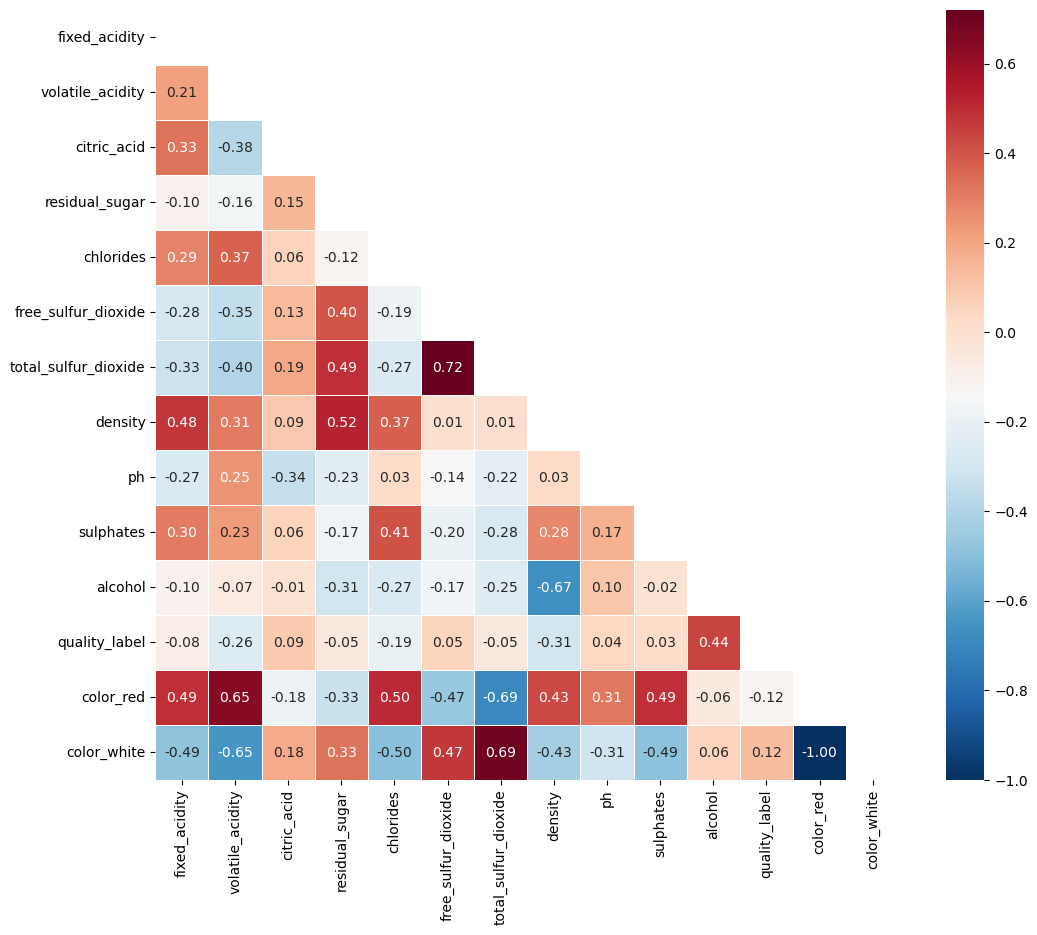

In [214]:
plt.figure(figsize=(12,10))
mask = np.triu(wine_corr)
sns.heatmap(wine_corr, annot=True, cmap='RdBu_r', fmt=".2f", linewidth=.5, mask=mask)
plt.show()

### Iterate over the matrix

In [215]:
for feature, value in wine_corr['quality_label'].abs().sort_values().items():
    print(feature, value)

sulphates 0.026527434802303854
ph 0.03858773514934523
total_sulfur_dioxide 0.04677623575645383
residual_sugar 0.04699282024089401
free_sulfur_dioxide 0.05183199925479495
fixed_acidity 0.08074675524253287
citric_acid 0.08773734632086501
color_white 0.12486800199601647
color_red 0.12486800199601665
chlorides 0.1947821273627263
volatile_acidity 0.2585172754858002
density 0.3051596889225514
alcohol 0.4391127447860114
quality_label 1.0


In [216]:
models_short = [DecisionTreeClassifier, RandomForestClassifier,
          SVC, AdaBoostClassifier]

def remove_single_features(models, wine_ml):

    wine_corr = wine_ml.corr()
    df_list = []

    # get baseline
    base_score = get_accuracy_for_models(models_short, wine_ml)

    # adjust column name
    base_score.rename(columns={'accuracy' : 'base'}, inplace=True)

    # append to list
    df_list.append(base_score)

    # iterate over features, starting from least correlated
    for feature, value in wine_corr['quality_label'].abs().sort_values().drop('quality_label').items():
        
        # remove the feature
        wine_ml_reduced = wine_ml.drop(feature, axis=1)

        # get accuracy scores
        scores = get_accuracy_for_models(models, wine_ml_reduced)

        # adjust column name
        scores.rename(columns={'accuracy' : feature}, inplace=True)

        # append to list
        df_list.append(scores)

    concatenated_df = pd.concat([df.set_index('model') for df in df_list], axis=1)

    return concatenated_df.T

In [217]:
#remove_single_features(models_short, wine_ml)

In [218]:
#remove_single_features(models_short, white_wine_ml)

In [219]:
#remove_single_features(models_short, red_wine_ml)

In [220]:
def remove_single_features_aggregated(models, wine_ml):

    wine_corr = wine_ml.corr()
    df_list = []
    wine_ml_reduced = wine_ml

    # get baseline
    base_score = get_accuracy_for_models(models_short, wine_ml)

    # adjust column name
    base_score.rename(columns={'accuracy' : 'base'}, inplace=True)

    # append to list
    df_list.append(base_score)

    # iterate over features, starting from least correlated
    for feature, value in wine_corr['quality_label'].abs().sort_values().drop('quality_label').items():
        
        
        # remove the feature
        wine_ml_reduced = wine_ml_reduced.drop(feature, axis=1)

        # get accuracy scores
        scores = get_accuracy_for_models(models, wine_ml_reduced)

        # adjust column name
        scores.rename(columns={'accuracy' : feature}, inplace=True)

        # append to list
        df_list.append(scores)

    concatenated_df = pd.concat([df.set_index('model') for df in df_list], axis=1)

    return concatenated_df.T

In [221]:
#remove_single_features_aggregated(models_short, wine_ml)

In [222]:
#remove_single_features_aggregated(models_short, white_wine_ml)

In [223]:
#remove_single_features_aggregated(models_short, red_wine_ml)

# Tuning Hyperparameters of Machine Learning Model

### Baseline

In [224]:
X_train, X_test, y_train, y_test = split_wine_data(wine_ml)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7190
Confusion Matrix:
 [[272 115   0]
 [153 492   0]
 [  1  30   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       387
           1       0.77      0.76      0.77       645
           2       1.00      0.03      0.06        32

    accuracy                           0.72      1064
   macro avg       0.80      0.50      0.50      1064
weighted avg       0.73      0.72      0.71      1064



### Parameters for the testing

In [225]:
# define the parameters for the hyperparameter grid
n_estimators_range = np.arange(10,210,10)
criterion_choice = ['gini', 'entropy', 'log_loss']
max_features_choice = ['sqrt', 'log2', None]
class_weight_choice = ['balanced', 'balanced_subsample']

# define the hyperparameter grid
param_grid = dict(criterion=criterion_choice, n_estimators=n_estimators_range, max_features=max_features_choice,
                  class_weight=class_weight_choice)

param_grid_short = dict(criterion=criterion_choice, max_features=max_features_choice, class_weight=class_weight_choice)

# define the model
rf = RandomForestClassifier()

### GridSearchCV tests all combinations of parameters provided

In [226]:
# create the GridSearchCV object
grid = GridSearchCV(estimator=rf, param_grid=param_grid_short, cv=5, scoring='f1_weighted')

# get the split data
X_train, X_test, y_train, y_test = split_wine_data(wine_ml)

# fit the object to the data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]})

In [227]:
print("The best parameters are %s with a score of %0.4f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'sqrt'} with a score of 0.7375


In [228]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["accuracy"])],axis=1)
grid_results

,class_weight,criterion,max_features,accuracy
0,balanced,gini,sqrt,0.734966
1,balanced,gini,log2,0.726033
2,balanced,gini,None,0.718284
3,balanced,entropy,sqrt,0.733790
4,balanced,entropy,log2,0.730735
5,balanced,entropy,None,0.726035
6,balanced,log_loss,sqrt,0.737550
7,balanced,log_loss,log2,0.731441
8,balanced,log_loss,None,0.722276
9,balanced_subsample,gini,sqrt,0.731207


In [229]:
grid_contour = grid_results.groupby(['class_weight', 'criterion', 'max_features']).mean()
grid_contour

accuracy
class_weight       criterion max_features          
balanced           entropy   log2          0.730735
                             sqrt          0.733790
                   gini      log2          0.726033
                             sqrt          0.734966
                   log_loss  log2          0.731441
                             sqrt          0.737550
balanced_subsample entropy   log2          0.727209
                             sqrt          0.737550
                   gini      log2          0.730501
                             sqrt          0.731207
                   log_loss  log2          0.732380
                             sqrt          0.736611

In [230]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['class_weight','criterion', 'max_features', 'accuracy']
grid_pivot = grid_reset.pivot('class_weight', 'criterion', 'max_features')
grid_pivot

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

### RandomizedSearchCV tests n combinations of parameters provided

In [231]:
# create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, scoring='accuracy', cv=5, random_state=0)

# get the split data
X_train, X_test, y_train, y_test = split_wine_data(wine_ml)

# fit the object to the data
random_search.fit(X_train, y_train)

# Get the best hyperparametbest_params = random_search.best_params_

In [232]:
best_params = random_search.best_params_
best_params

{'n_estimators': 170,
 'max_features': 'sqrt',
 'criterion': 'log_loss',
 'class_weight': 'balanced'}

In [233]:
print("The best parameters are %s with a score of %0.4f"
      % (random_search.best_params_, random_search.best_score_))

The best parameters are {'n_estimators': 170, 'max_features': 'sqrt', 'criterion': 'log_loss', 'class_weight': 'balanced'} with a score of 0.7234


In [234]:
# export the grid search parameters and their resulting scores into a dataframe
random_search_results = pd.concat([pd.DataFrame(random_search.cv_results_["params"]),pd.DataFrame(random_search.cv_results_["mean_test_score"],
                                                                                columns=["accuracy"])],axis=1)

In [235]:
random_search_results.sort_values('accuracy', ascending=False)

,n_estimators,max_features,criterion,class_weight,accuracy
16,170,sqrt,log_loss,balanced,0.723355
17,190,log2,log_loss,balanced,0.722071
8,180,log2,gini,balanced,0.721690
14,50,log2,log_loss,balanced,0.720461
4,110,log2,entropy,balanced,0.718475
3,170,log2,gini,balanced_subsample,0.718229
11,160,None,log_loss,balanced_subsample,0.717372
2,70,None,entropy,balanced,0.716485
10,70,log2,gini,balanced,0.716459
0,70,sqrt,gini,balanced,0.715384


In [236]:
random_search_results_df = pd.DataFrame(random_search.cv_results_)
random_search_results_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_criterion,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,1.223872,0.071229,0.031693,0.000413,170,sqrt,log_loss,balanced,"{'n_estimators': 170, 'max_features': 'sqrt', ...",0.710777,0.713075,0.724565,0.735351,0.733008,0.723355,0.010024,1
17,1.335137,0.005406,0.035777,0.000226,190,log2,log_loss,balanced,"{'n_estimators': 190, 'max_features': 'log2', ...",0.710012,0.716095,0.716095,0.734411,0.733741,0.722071,0.010053,2
8,1.081435,0.003896,0.033930,0.000140,180,log2,gini,balanced,"{'n_estimators': 180, 'max_features': 'log2', ...",0.707949,0.709992,0.721206,0.731274,0.738030,0.721690,0.011702,3
14,0.350889,0.003745,0.010904,0.000085,50,log2,log_loss,balanced,"{'n_estimators': 50, 'max_features': 'log2', '...",0.713664,0.703476,0.711415,0.735543,0.738208,0.720461,0.013849,4
4,0.771609,0.004636,0.021461,0.000175,110,log2,entropy,balanced,"{'n_estimators': 110, 'max_features': 'log2', ...",0.699103,0.714073,0.721866,0.725789,0.731546,0.718475,0.011229,5
3,1.156116,0.006669,0.032384,0.000203,170,log2,gini,balanced_subsample,"{'n_estimators': 170, 'max_features': 'log2', ...",0.700424,0.706148,0.714692,0.734980,0.734901,0.718229,0.014381,6
11,3.756421,0.009828,0.028740,0.000325,160,None,log_loss,balanced_subsample,"{'n_estimators': 160, 'max_features': None, 'c...",0.712918,0.704562,0.709400,0.724216,0.735764,0.717372,0.011248,7
2,1.636914,0.012804,0.013970,0.000226,70,None,entropy,balanced,"{'n_estimators': 70, 'max_features': None, 'cr...",0.714467,0.707963,0.703069,0.726053,0.730874,0.716485,0.010538,8
10,0.422530,0.002653,0.014492,0.000071,70,log2,gini,balanced,"{'n_estimators': 70, 'max_features': 'log2', '...",0.704208,0.706391,0.714692,0.725542,0.731462,0.716459,0.010603,9
0,0.433575,0.003352,0.015728,0.001893,70,sqrt,gini,balanced,"{'n_estimators': 70, 'max_features': 'sqrt', '...",0.704180,0.699539,0.709279,0.735668,0.728254,0.715384,0.014078,10


In [237]:
best_params

{'n_estimators': 170,
 'max_features': 'sqrt',
 'criterion': 'log_loss',
 'class_weight': 'balanced'}

In [238]:
X_train, X_test, y_train, y_test = split_wine_data(wine_ml)

# initialize the model
forest = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                max_features=best_params['max_features'],
                                criterion=best_params['criterion'],
                                class_weight=best_params['class_weight'],
                                random_state=0)

forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7622
Confusion Matrix:
 [[264 123   0]
 [ 98 547   0]
 [  1  31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70       387
           1       0.78      0.85      0.81       645
           2       0.00      0.00      0.00        32

    accuracy                           0.76      1064
   macro avg       0.50      0.51      0.51      1064
weighted avg       0.74      0.76      0.75      1064



/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [239]:
kappa = cohen_kappa_score(y_pred, y_test)
print("Cohen-Kappa score:", kappa)

Cohen-Kappa score: 0.5010065434593212
